# Introduction to EM for GMM Continued...

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline

def EM_GaussianMixture(X, NumberOfComponents):
    
    MaximumNumberOfIterations = 100
    DiffThresh = 1e-4
    N = X.shape[0] #number of data points
    d = X.shape[1] #dimensionality
    rp = np.random.permutation(N) #random permutation of numbers 1:N

    #Initialize Parameters
    Means = X[rp[0:NumberOfComponents],:]
    Sigs = np.zeros((d,d,NumberOfComponents))
    Ps = np.zeros((NumberOfComponents,))
    pZ_X = np.zeros((N,NumberOfComponents))

    for i in range(NumberOfComponents):
        Sigs[:,:,i] = np.eye(d)
        Ps[i] = 1/NumberOfComponents

    #Solve for p(z | x, Theta(t))
    for k in range(NumberOfComponents):
        mvn = stats.multivariate_normal(Means[k,:],Sigs[:,:,k])
        pZ_X[:,k] = mvn.pdf(X)*Ps[k]

    pZ_X = pZ_X / pZ_X.sum(axis=1)[:,np.newaxis]  # np.newaxis fixes cannot broadcast (N,d) (N,) errors

    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations <= MaximumNumberOfIterations:
        #Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumberOfComponents):
            #Means
            Means[k,:] = np.sum(X*pZ_X[:,k,np.newaxis],axis=0)/pZ_X[:,k].sum()
            
            #Sigs
            xDiff = X - Means[k,:] 
            J = np.zeros((d,d))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:],xDiff[i,:])
            Sigs[:,:,k] = J / pZ_X[:,k].sum()
            
            #Ps
            Ps[k] = pZ_X[:,k].sum()/N

        #Solve for p(z | x, Theta(t))
        for k in range(NumberOfComponents):
            mvn = stats.multivariate_normal(Means[k,:],Sigs[:,:,k])
            pZ_X[:,k] = mvn.pdf(X)*Ps[k]
        pZ_X = pZ_X / pZ_X.sum(axis=1)[:,np.newaxis]
    
        Diff = abs(MeansOld - Means).sum() + abs(SigsOld - Sigs).sum() + abs(PsOld - Ps).sum();
        NumberIterations = NumberIterations + 1
    
    return Means, Sigs, Ps, pZ_X

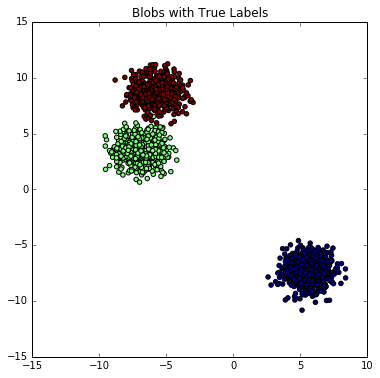

In [7]:
n_samples = 1500
n_clusters = 3

# Make Blob Data
X, y_blobs = datasets.make_blobs(n_samples=n_samples)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_blobs)
plt.title("Blobs with True Labels")


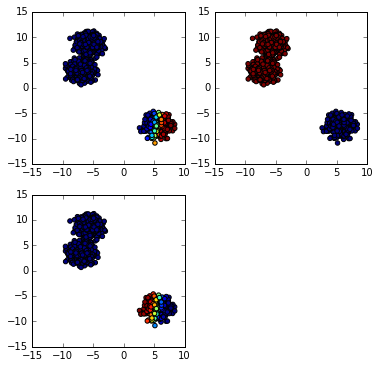

In [12]:
Means, Sigs, Ps, pZ_X = EM_GaussianMixture(X, 3)


plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,0])

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,1])


plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,2])

